# A. Loading Data 

1. Import the `pandas` package. 
2. Using pandas, load the `agaricus-lepiota.data` data and call the dataframe `mushroom`. Use the `names` argument to define the column names. 

In [2]:
import pandas as pd

# Define column names 
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

# Load the dataset
mushroom = pd.read_csv('agaricus-lepiota.data', names=column_names)

# Define feature mappings
value_mappings = {
    "class": {"e": "edible", "p": "poisonous"},
    "cap-shape": {"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"},
    "cap-surface": {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
    "cap-color": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink",
                  "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "bruises": {"t": "bruises", "f": "no"},
    "odor": {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty",
             "n": "none", "p": "pungent", "s": "spicy"},
    "gill-attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
    "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green",
                   "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs",
                   "r": "rooted", "?": "missing"},
    "stalk-surface-above-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-surface-below-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-color-above-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange",
                               "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "stalk-color-below-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange",
                               "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": "none", "o": "one", "t": "two"},
    "ring-type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large",
                  "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"},
    "spore-print-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green",
                          "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
    "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered",
                   "v": "several", "y": "solitary"},
    "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban",
                "w": "waste", "d": "woods"}
}

# Create Readable Features 
for col in mushroom.columns:
    if col in value_mappings:
        mushroom[col] = mushroom[col].map(value_mappings[col])

# B. Inspect Data 
1. The label we want to predict is called `class`. Use the `value_counts()` function to print the number of poisonous and non-poisonous mushrooms. 
2. What features do we have to predict poisonous and non-poisonous mushrooms? Use a for loop to loop through the columns of the `mushroom` dataset, and print the `value_counts()` for each column. Are these features primarily discrete or continuous? 




In [3]:
# Inspect Labels   
print(mushroom['class'].value_counts())

# Loop through columns, print value counts
for col in mushroom.columns:
    print(f"\n{col}:")
    print(mushroom[col].value_counts())

# Some features which we have to predict p or np are the cap shape, color, surface, gill features, stalk features, and odor.
# the features are primarily discrete since they represent different categories instead of numeric values.

class
edible       4208
poisonous    3916
Name: count, dtype: int64

class:
class
edible       4208
poisonous    3916
Name: count, dtype: int64

cap-shape:
cap-shape
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: count, dtype: int64

cap-surface:
cap-surface
scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: count, dtype: int64

cap-color:
cap-color
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: count, dtype: int64

bruises:
bruises
no         4748
bruises    3376
Name: count, dtype: int64

odor:
odor
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64

gill-attachment:
gill-attachment
free        7914
attached     210
Name: count, dtype: int64

gill-spacing:
gi

# C. Defining Features and Labels 
1. Use the `mushroom` dataset to define a set of features, X. Be sure to drop the `class` variable from `mushroom` when completing this step. 
2. Use the `mushroom` dataset to define the target variable, y. 
3. Print the shape of X and y. 

**Question: Why do we need to drop class from  X?**

In [4]:
# Split dataset into features (X) and target (y)
X = mushroom.drop('class', axis=1)
y = mushroom['class']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Because if you know the class already, in training would have perfect accuracy, 
# but for a real world application, you would only have the features to work with. 
# You don't want the model to have the answer.

Shape of X: (8124, 22)
Shape of y: (8124,)


# D. Feature Generation 
1. Convert each of the categorical features of X to binary ``dummy`` variables using the `get_dummies()` function. 

In [5]:
# Encode categorical features
X = pd.get_dummies(X)

# E. Train/Test/Holdout Split
1. Import the `train_test_split` function from `sklearn.model_selection`. 
2. Use `train_test_split` to divide the data into a 60% training sample, a 20% testing sample, and a 20% holdout sample. Call the respective datasets `X_train`,`X_test`, `X_holdout`, `y_train`, `y_test`, and `y_holdout`.  

**Question: Why do we divide the data into these three samples? Why must we keep them separate?**

In [6]:
### Train (60%), Holdout (20%), Test Split (20%) ### 

from sklearn.model_selection import train_test_split

# First split: 60% train, 40% temp (which will become test + holdout)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: divide temp into 50% test and 50% holdout (which gives 20% each of original)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# We divide the data into three sample to avoid overfitting and to ensure that the model generalizes well to unseen data.

# F. Train Decision Trees 
1. From `sklearn.tree` import the `DecisionTreeClassifier` function. 
2. Define models labeled `tree_depth_1`, `tree_depth_2`, `tree_depth_3` and `tree_depth_10` using the `DecisionTreeClassifier` function and varying the `max_depth` parameter. For replicability, set the `random_state` parameter to 42. 
3. Fit the models using the `.fit()` function, the `X_train` features, and `y_train` labels. 
4. Compute and print the accuracy of each model using the `.score()` function, the `X_holdout` features, and the `y_holdout` labels. 

In [7]:
# Train decision trees with depths 0 to 3
from sklearn.tree import DecisionTreeClassifier

tree_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth_10 = DecisionTreeClassifier(max_depth=10, random_state=42)

tree_depth_1.fit(X_train, y_train)
tree_depth_2.fit(X_train, y_train)
tree_depth_3.fit(X_train, y_train)
tree_depth_10.fit(X_train, y_train)

# Compute accuracy on holdout set 
print(f"Tree Depth 1 Accuracy: {tree_depth_1.score(X_holdout, y_holdout):.4f}")
print(f"Tree Depth 2 Accuracy: {tree_depth_2.score(X_holdout, y_holdout):.4f}")
print(f"Tree Depth 3 Accuracy: {tree_depth_3.score(X_holdout, y_holdout):.4f}")
print(f"Tree Depth 10 Accuracy: {tree_depth_10.score(X_holdout, y_holdout):.4f}")

Tree Depth 1 Accuracy: 0.8806
Tree Depth 2 Accuracy: 0.9495
Tree Depth 3 Accuracy: 0.9834
Tree Depth 10 Accuracy: 1.0000


# G. Prediction
1. Use the `.iloc[]` function to save the first 5 observations for the `X_holdout` data to `sample_data` 
2. Use each of the three trained tree models and the `.predict` function to predict labels for these data. Print these predicted labels. 


In [8]:
# Select a few test examples to compare predictions
sample_data = X_holdout.iloc[:5]

print("Predictions from Tree Depth 1:")
print(tree_depth_1.predict(sample_data))

print("\nPredictions from Tree Depth 2:")
print(tree_depth_2.predict(sample_data))

print("\nPredictions from Tree Depth 3:")
print(tree_depth_3.predict(sample_data))

print("\nPredictions from Tree Depth 10:")
print(tree_depth_10.predict(sample_data))

Predictions from Tree Depth 1:
['edible' 'poisonous' 'edible' 'poisonous' 'poisonous']

Predictions from Tree Depth 2:
['edible' 'poisonous' 'edible' 'poisonous' 'poisonous']

Predictions from Tree Depth 3:
['edible' 'poisonous' 'edible' 'poisonous' 'poisonous']

Predictions from Tree Depth 10:
['edible' 'poisonous' 'edible' 'poisonous' 'poisonous']


# H. Vizualizing Trees 
1. Use the `plt` function from the `matplotlib.pyplot` library and `plot_tree()` function from the `sklearn.tree` library to graph the fitted trees. Make one graph for each tree (four total). Include a plot title, and use the `feature_names` and `class_names` arguments to make the graph readable. 

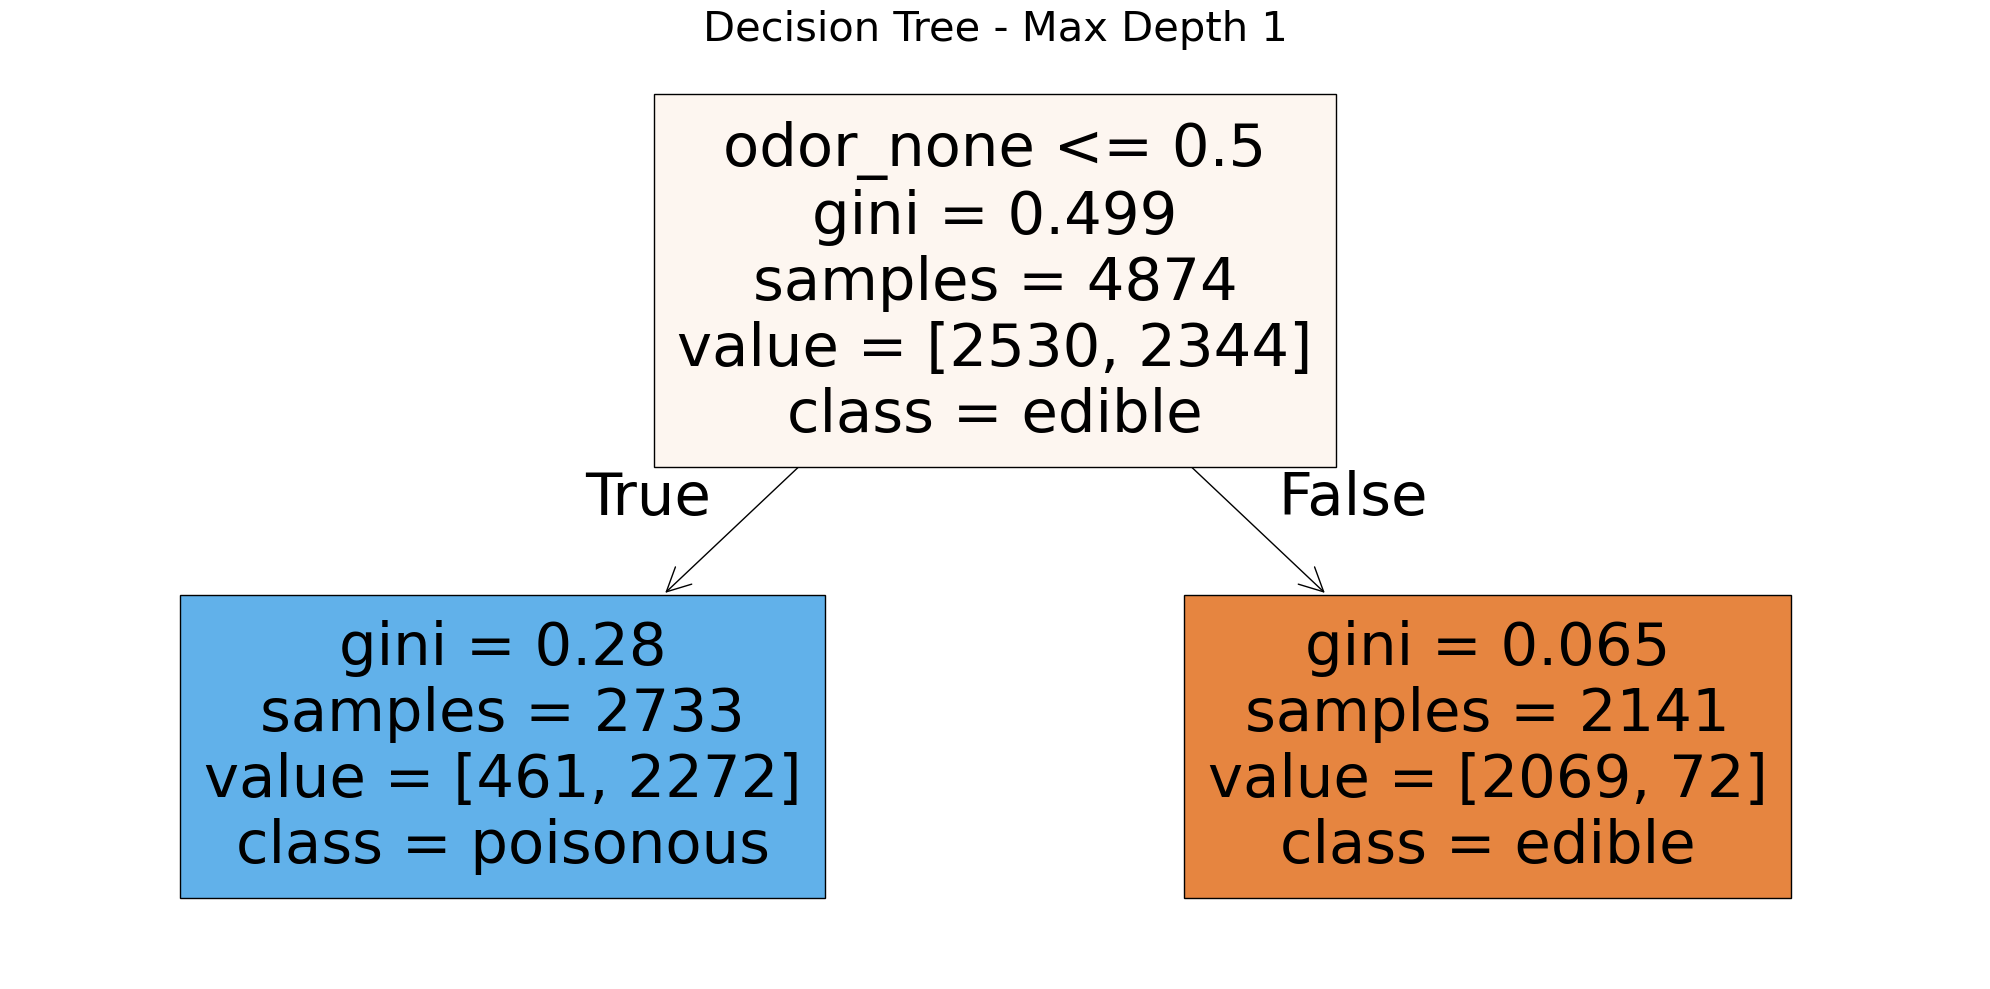

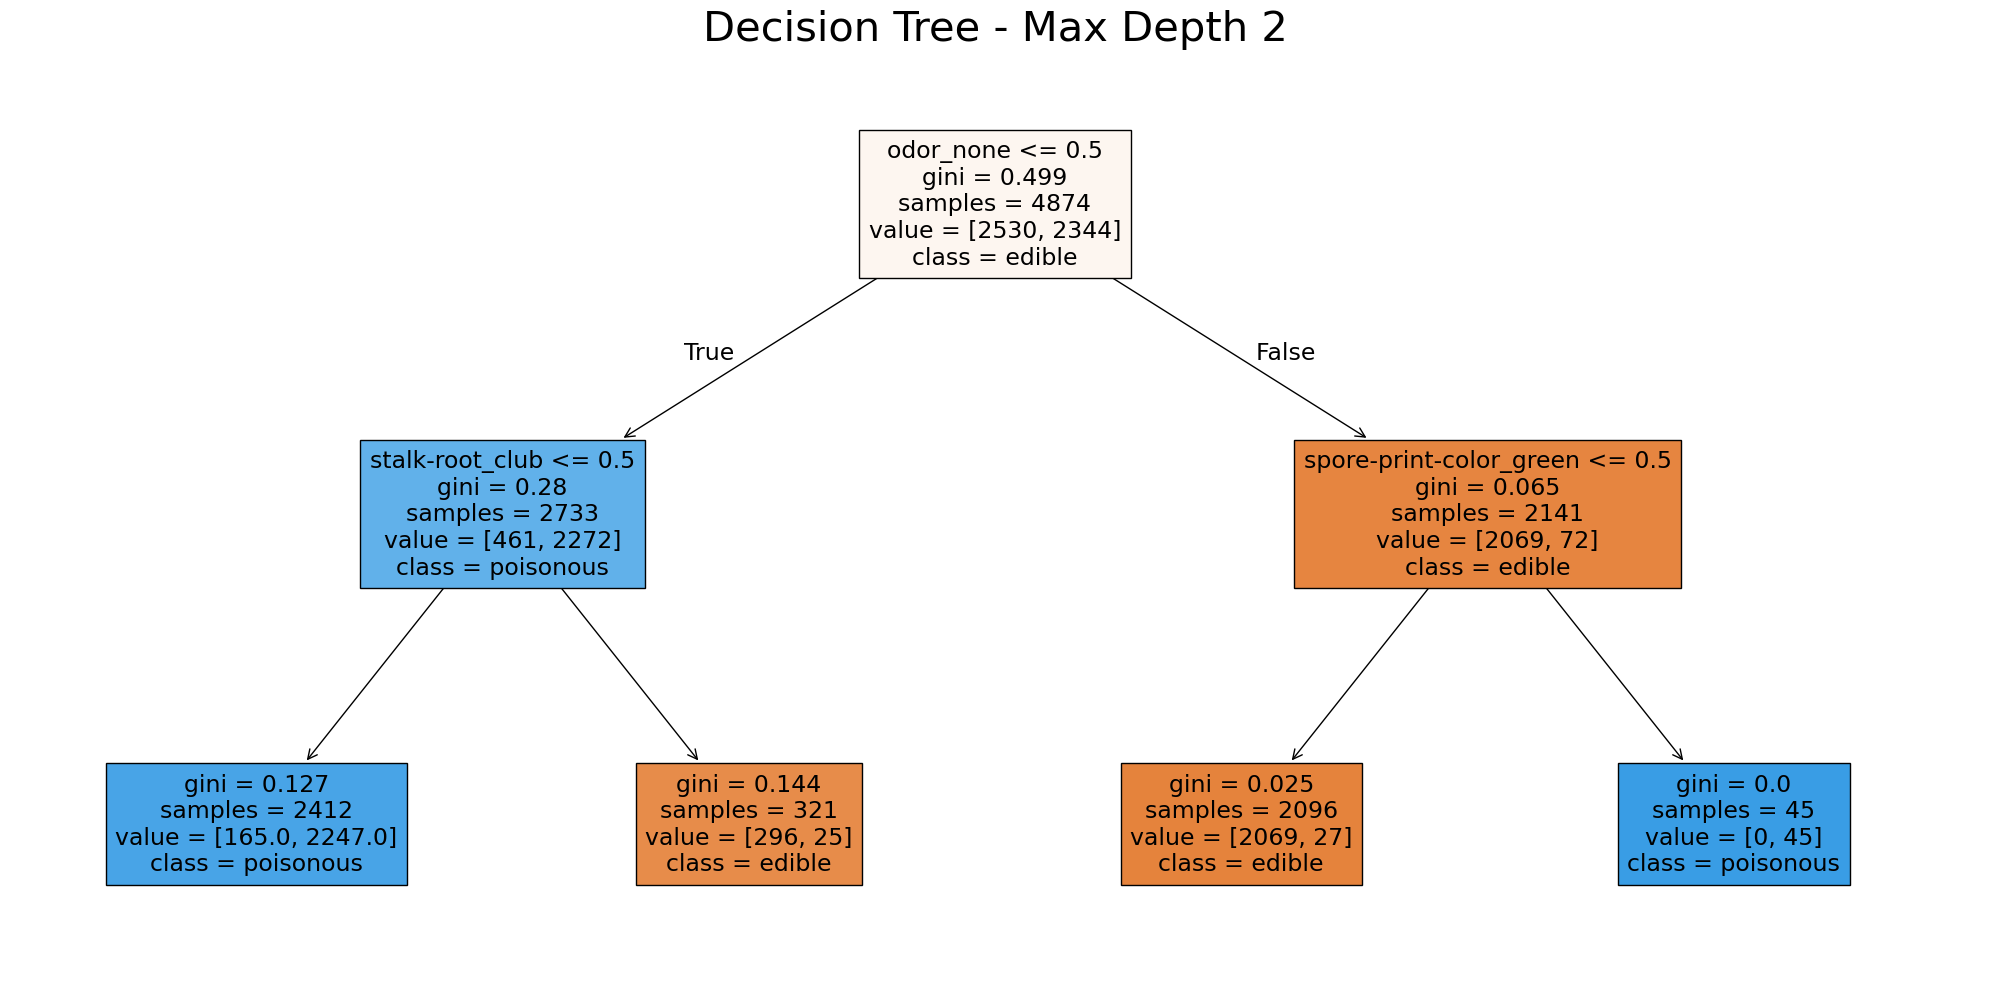

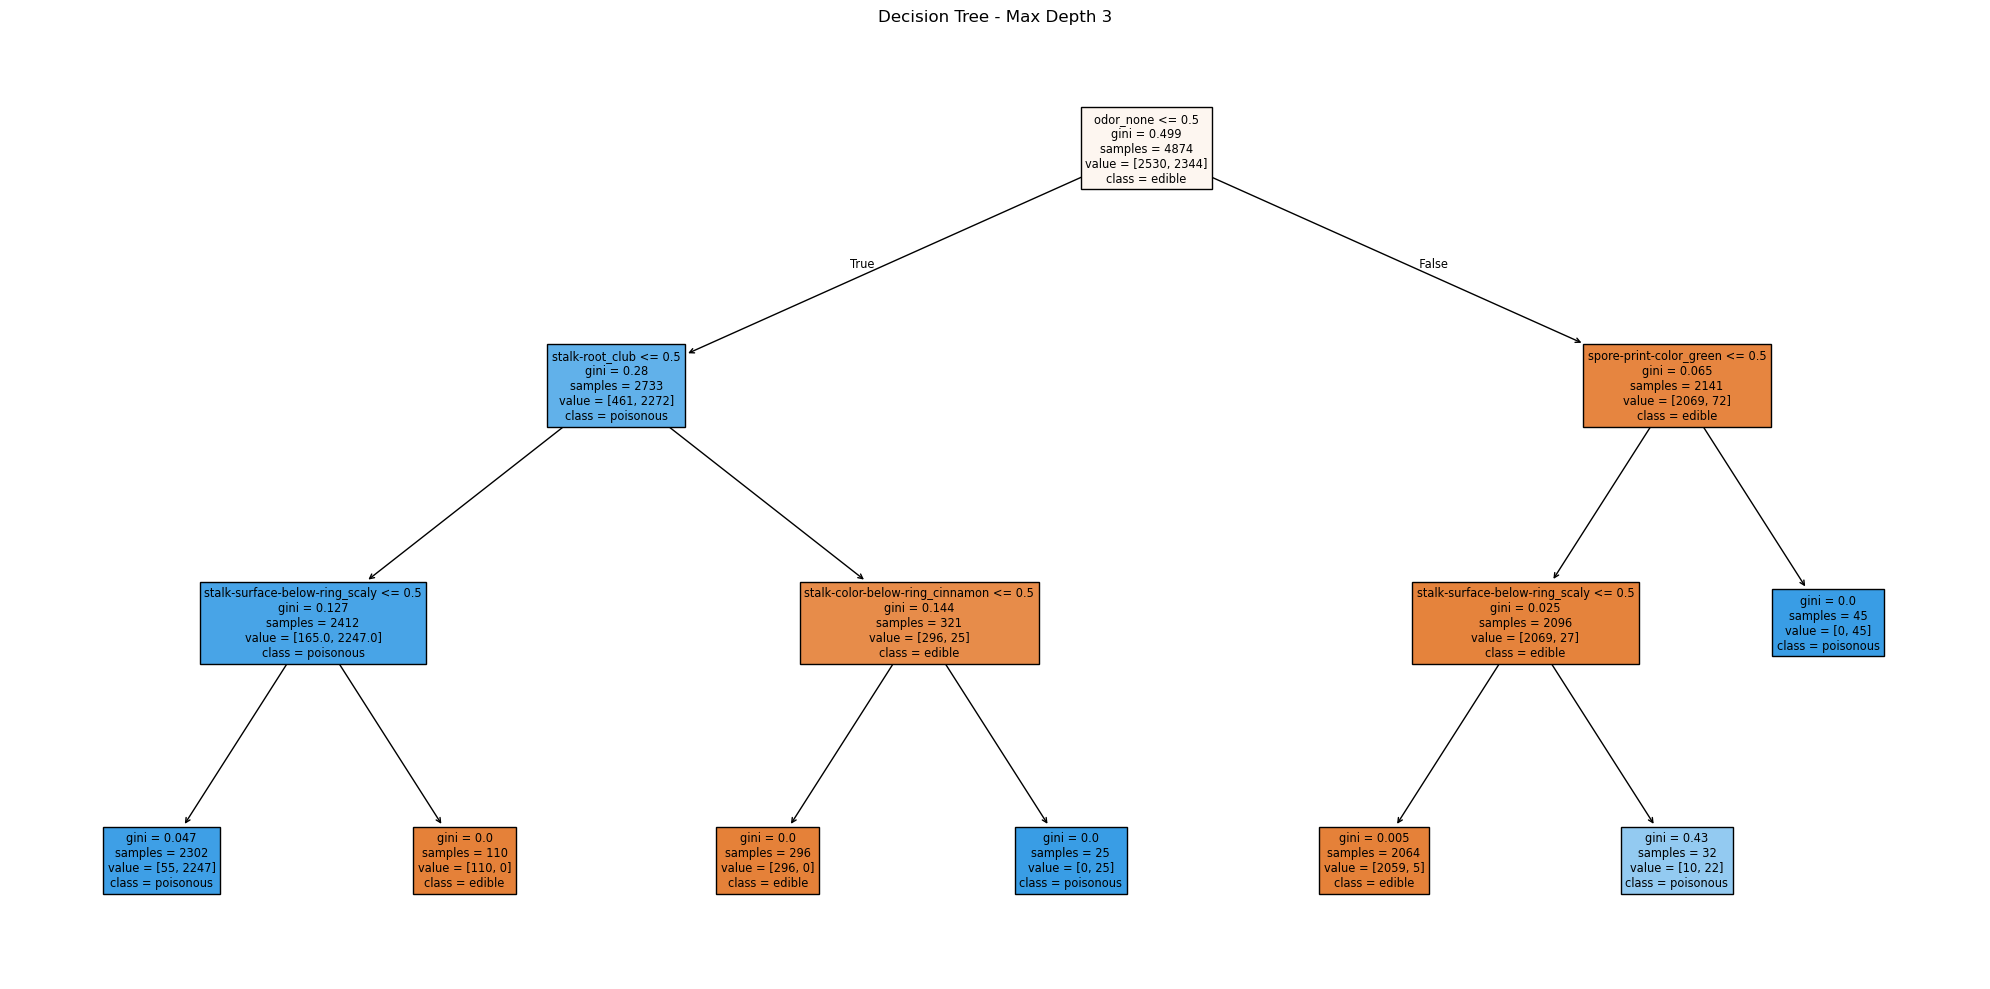

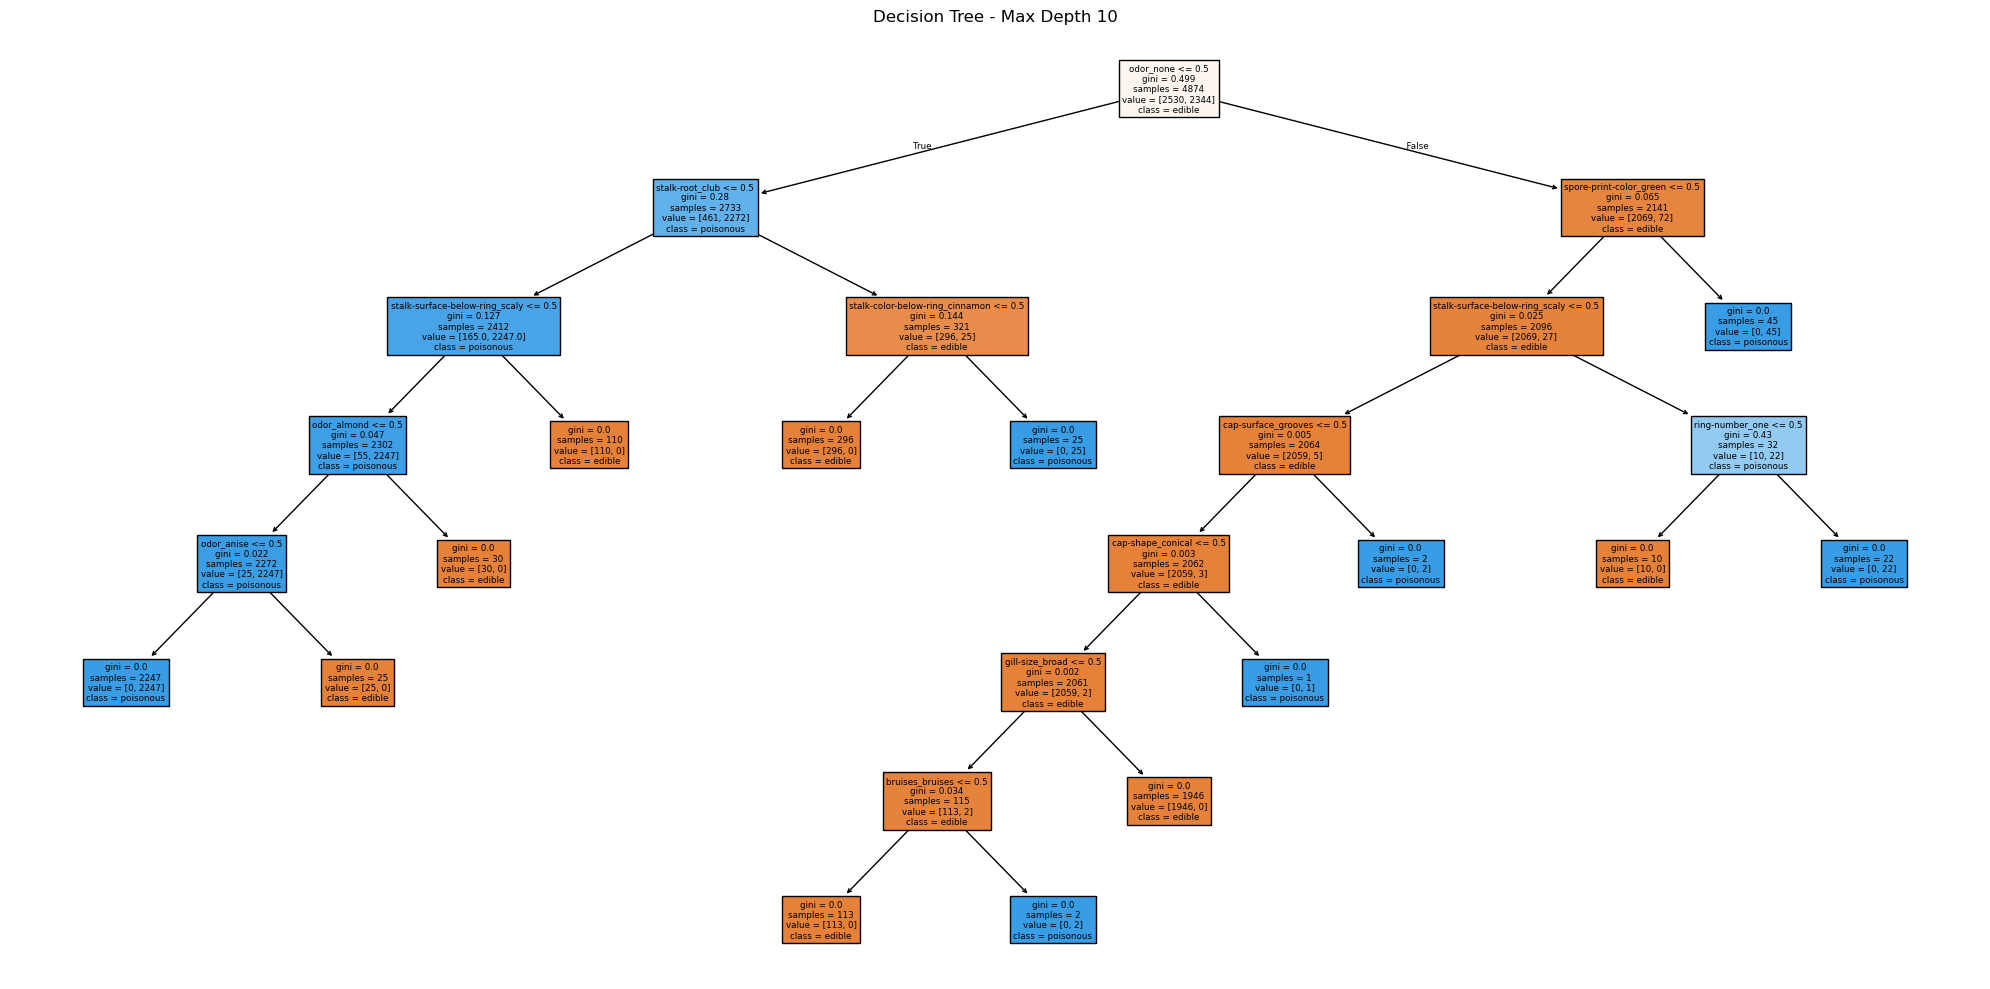

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot Tree Depth 1
plt.figure(figsize=(20, 10))
plot_tree(tree_depth_1, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title("Decision Tree - Max Depth 1", fontsize=30)
plt.tight_layout()
plt.show()

# Plot Tree Depth 2
plt.figure(figsize=(20, 10))
plot_tree(tree_depth_2, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title("Decision Tree - Max Depth 2", fontsize=25)
plt.tight_layout()
plt.show()

# Plot Tree Depth 3
plt.figure(figsize=(20, 10))
plot_tree(tree_depth_3, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title("Decision Tree - Max Depth 3") # font size does not need to be learger since rest of data is smaller text
plt.tight_layout()
plt.show()

# Plot Tree Depth 10
plt.figure(figsize=(20, 10))
plot_tree(tree_depth_10, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title("Decision Tree - Max Depth 10")
plt.tight_layout()
plt.show()

In [ ]:
# transcript with Gemini https://gemini.google.com/share/0015a41e2ce5